In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pylab as pl
from itertools import cycle

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [3]:
K = 1.
g = 1.
r_imm = 0.55*g*K
r_det = 0.5*g

N_star = 1.17

t_samples = np.linspace(0., 10., 100)

N_0 = np.array([0.])

In [19]:
# the stochastic pops used for comparison
pops_4c_immig_0_55_bigK = pd.read_csv('solo_results_bigK/ratios4c_rImmig_0_55-stochastic_pop_over_time.csv', delimiter=", ", engine='python')

# the hopefully correct stochastic pops (with logistic death)
pops_4c_immig_0_55_bigK_v2 = pd.read_csv('../biofilm_threshold_theory_v2/solo_results_bigK_v2/ratios4c_rImmig_0_55-stochastic_pop_over_time_v2.csv')
pops_4c_immig_0_6_bigK_v2  = pd.read_csv('../biofilm_threshold_theory_v2/solo_results_bigK_v2/ratios4c_rImmig_0_6-stochastic_pop_over_time_v2.csv')

In [5]:
def logistic_growth(t, f, r_imm, r_det):
    '''
    f0 = N -> dN/dt
    '''
    
    N = f[0]
    
    f_prime = np.zeros_like(f)
    
    f_prime[0] = g*N*(1 - N/K) + r_imm - N*r_det
    
    return f_prime

In [6]:
def pseudo_logistic_growth(t, f, r_imm, r_det):
    '''
    this version is for the stochastic algorithm, which doesn't allow for negative values in the logistic growth term
    '''
    
    N = f[0]
    
    f_prime = np.zeros_like(f)
    
    growth_term = 0 if N >=K else g*N*(1 - N/K)
    
    f_prime[0] = growth_term + r_imm - N*r_det
    
    return f_prime

In [22]:
sol_logistic = solve_ivp(fun=logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(r_imm, r_det))
sol_pseudo_logistic = solve_ivp(fun=pseudo_logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(r_imm, r_det))

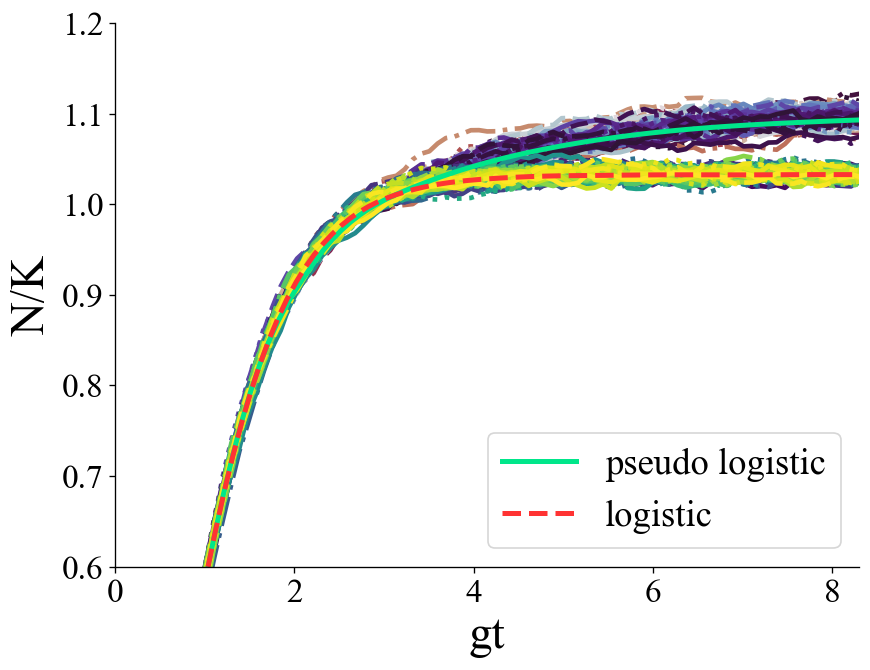

In [21]:
fig, ax = plt.subplots(figsize=(8,6), dpi=120)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pop_dataset = pops_4c_immig_0_55_bigK
nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
#allows us to alternate line styles for the different runs
lines = ["-","--","-.",":"]
linecycler = cycle(lines[::-1])
for p in range(nCols):
    ax.plot(pop_dataset['t']*0.083, pop_dataset[str(p)]/10000, lw=2.8, color=colors[p], ls=next(linecycler))

pop_dataset = pops_4c_immig_0_55_bigK_v2
nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
colors = pl.cm.viridis(np.linspace(0,1,nCols))
#allows us to alternate line styles for the different runs
lines = ["-","--","-.",":"]
linecycler = cycle(lines[::-1])
for p in range(nCols):
    ax.plot(pop_dataset['t']*0.083, pop_dataset[str(p)]/10000, lw=2.8, color=colors[p], ls=next(linecycler))

    

plt.plot(sol_pseudo_logistic.t, sol_pseudo_logistic.y[0], lw=3, label='pseudo logistic', c='#00e68a')
plt.plot(sol_logistic.t, sol_logistic.y[0], lw=3, label='logistic', ls='--', c='#ff3333')

plt.xlabel('gt', fontsize=28)
plt.ylabel('N/K', fontsize=28)

plt.xlim(0, 8.3)
plt.ylim(0.6, 1.2)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.legend(fontsize=22)
#plt.savefig('paper_plots/pseudo_logistic_comparison.pdf', dpi=330, bbox_inches='tight')
plt.show()

### Get the equivalent pseudo-logistic curves for Figure 4c (deterministic stochastic comparison) for the three immigration rates

In [41]:
sol_pseudo_logistic_rImm_0_55 = solve_ivp(fun=pseudo_logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(0.55*g*K, r_det))
sol_pseudo_logistic_rImm_0_6 = solve_ivp(fun=pseudo_logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(0.6*g*K, r_det))
sol_pseudo_logistic_rImm_0_65 = solve_ivp(fun=pseudo_logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(0.65*g*K, r_det))


sol_logistic_rImm_0_75 = solve_ivp(fun=logistic_growth, t_eval=t_samples, y0=N_0, t_span=(t_samples[0], t_samples[-1]), args=(0.78*K, r_det))
print(sol_logistic_rImm_0_75.y[0][-1])

1.1677969838093698


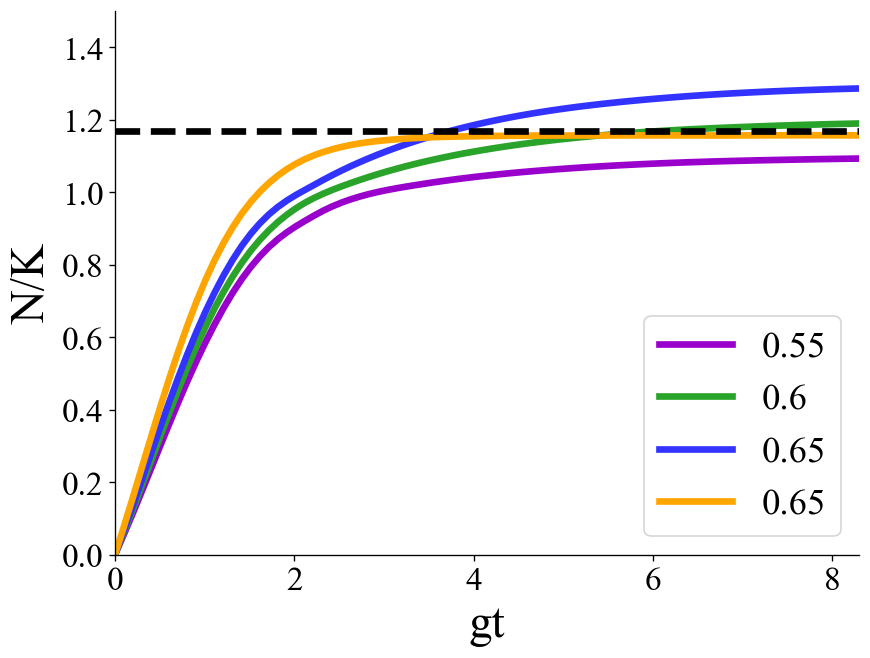

In [26]:
fig, ax = plt.subplots(figsize=(8,6), dpi=120)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# pop_dataset = pops_4c_immig_0_55_bigK
# nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
# colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
# #allows us to alternate line styles for the different runs
# lines = ["-","--","-.",":"]
# linecycler = cycle(lines[::-1])
# for p in range(nCols):

#     ax.plot(pop_dataset['t']*0.083, pop_dataset[str(p)]/10000, lw=2.8, color=colors[p], ls=next(linecycler))
    
#"#9900cc", "#29a329", "#3333ff"
plt.plot(sol_pseudo_logistic_rImm_0_55.t, sol_pseudo_logistic_rImm_0_55.y[0], lw=4, label='0.55', c='#9900cc')
plt.plot(sol_pseudo_logistic_rImm_0_6.t, sol_pseudo_logistic_rImm_0_6.y[0], lw=4, label='0.6', c='#29a329')
plt.plot(sol_pseudo_logistic_rImm_0_65.t, sol_pseudo_logistic_rImm_0_65.y[0], lw=4, label='0.65', c='#3333ff')
plt.plot(sol_logistic_rImm_0_75.t, sol_logistic_rImm_0_75.y[0], lw=4, label='0.65', c='orange')


plt.axhline(N_star, lw=4, c='k', ls='--')

plt.xlabel('gt', fontsize=28)
plt.ylabel('N/K', fontsize=28)

plt.xlim(0, 8.3)
plt.ylim(0, 1.5)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.legend(fontsize=22)
plt.savefig('paper_plots/pseudo_logistic_Fig4c_recreation.pdf', dpi=330, bbox_inches='tight')
plt.show()

In [11]:
pops_4c_immig_0_55_bigK

,t,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.20,544.0,564.0,562.0,542.0,561.0,549.0,551.0,609.0,586.0,...,592.0,573.0,581.0,589.0,558.0,518.0,559.0,551.0,577.0,578.0
2,2.30,1057.0,1086.0,1114.0,1067.0,1100.0,1071.0,1073.0,1116.0,1107.0,...,1091.0,1114.0,1111.0,1188.0,1083.0,1055.0,1166.0,1115.0,1141.0,1118.0
3,3.39,1580.0,1651.0,1698.0,1570.0,1649.0,1615.0,1619.0,1695.0,1618.0,...,1696.0,1627.0,1665.0,1739.0,1598.0,1611.0,1670.0,1664.0,1727.0,1623.0
4,4.49,2132.0,2175.0,2232.0,2126.0,2183.0,2115.0,2195.0,2202.0,2223.0,...,2259.0,2183.0,2177.0,2275.0,2124.0,2164.0,2205.0,2245.0,2297.0,2133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,95.61,10869.0,11099.0,11015.0,10831.0,11037.0,11124.0,10940.0,10912.0,11037.0,...,10916.0,10994.0,10931.0,10734.0,10985.0,10733.0,10840.0,10865.0,10877.0,10938.0
87,96.71,10859.0,11136.0,11049.0,10868.0,11013.0,11165.0,10982.0,10934.0,10974.0,...,10888.0,11036.0,10960.0,10720.0,11011.0,10735.0,10863.0,10882.0,10871.0,10952.0
88,97.83,10860.0,11186.0,10999.0,10832.0,10979.0,11224.0,10970.0,10919.0,11037.0,...,10917.0,10994.0,10922.0,10731.0,11017.0,10741.0,10812.0,10865.0,10874.0,10937.0
89,98.93,10877.0,11167.0,11005.0,10836.0,10970.0,11202.0,10900.0,11002.0,11010.0,...,10898.0,11008.0,10926.0,10668.0,10976.0,10719.0,10878.0,10889.0,10925.0,10966.0


In [15]:
pops_4c_immig_0_55_bigK_v2

,t,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.20,581.0,549.0,531.0,515.0,594.0,552.0,559.0,557.0,565.0,...,587.0,536.0,559.0,617.0,532.0,555.0,581.0,546.0,552.0,573.0
2,2.30,1102.0,1130.0,1040.0,1080.0,1143.0,1096.0,1129.0,1074.0,1128.0,...,1087.0,1101.0,1079.0,1191.0,1079.0,1055.0,1087.0,1076.0,1033.0,1125.0
3,3.39,1669.0,1672.0,1605.0,1626.0,1686.0,1626.0,1690.0,1618.0,1683.0,...,1645.0,1664.0,1626.0,1721.0,1666.0,1604.0,1636.0,1595.0,1599.0,1706.0
4,4.48,2206.0,2237.0,2152.0,2113.0,2263.0,2191.0,2234.0,2158.0,2262.0,...,2214.0,2234.0,2092.0,2344.0,2238.0,2151.0,2179.0,2165.0,2174.0,2249.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,95.61,10421.0,10342.0,10465.0,10300.0,10313.0,10210.0,10428.0,10346.0,10387.0,...,10430.0,10349.0,10267.0,10231.0,10268.0,10312.0,10436.0,10434.0,10217.0,10287.0
87,96.71,10382.0,10364.0,10465.0,10293.0,10368.0,10214.0,10449.0,10347.0,10356.0,...,10419.0,10335.0,10257.0,10258.0,10256.0,10309.0,10444.0,10420.0,10253.0,10326.0
88,97.83,10372.0,10351.0,10422.0,10336.0,10384.0,10230.0,10453.0,10315.0,10344.0,...,10426.0,10348.0,10229.0,10256.0,10290.0,10292.0,10438.0,10412.0,10292.0,10323.0
89,98.93,10363.0,10330.0,10438.0,10342.0,10344.0,10272.0,10446.0,10298.0,10361.0,...,10395.0,10354.0,10237.0,10235.0,10318.0,10309.0,10379.0,10385.0,10302.0,10335.0


1.1568373469560531